<a href="https://colab.research.google.com/github/nirajitpramanik/machine-vision-lab/blob/main/Lab-01%3A%20Displaying%20Images%20from%20Different%20Color%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the required libraries

In [ ]:
import requests
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Loading the image using cv2
We use web URLs since the code is written on Google Colab

In [ ]:
def load_image(image_url):
    """
    Function to load an image, and decode its RGB values.
    """
    response = requests.get(image_url)
    if response.status_code == 200:
        img_array = np.asarray(bytearray(response.content), dtype=np.uint8)

        img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()

        return img_rgb
    else:
        print("Failed to retrieve the image. Check the URL.")
        return None

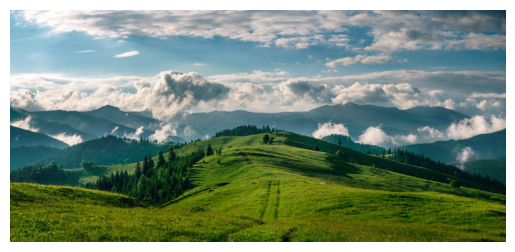

In [ ]:
image_url = "https://t4.ftcdn.net/jpg/02/01/78/01/360_F_201780104_hetXS26W8alnsbDKbpnr4sVizJfiO12w.jpg"

image = load_image(image_url)

### Conversion codes

In [ ]:
def convert_to_grayscale(image):
    """
    Code to convert RGB to Gray Scale using cv2.
    """
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

def convert_to_cmyk(image):
    """
    Code to convert RGB to CMYK using bruteforce approach.
    """
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0

    C = 1 - rgb_image[:, :, 0]
    M = 1 - rgb_image[:, :, 1]
    Y = 1 - rgb_image[:, :, 2]
    K = np.minimum(C, np.minimum(M, Y))

    C = (C - K) / (1 - K + 1e-10)
    M = (M - K) / (1 - K + 1e-10)
    Y = (Y - K) / (1 - K + 1e-10)

    CMYK = np.stack((C, M, Y, K), axis=-1)

    return CMYK

def convert_to_hsv(image):
    """
    Convert image from RGB to HSV using cv2.
    """
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    return hsv_image

In [ ]:
def display_images(image_dict):
    """
    Display the images in the dictionary.
    """
    num_images = len(image_dict)
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    for i, (title, image) in enumerate(image_dict.items()):
        axs[i].imshow(image)
        axs[i].set_title(title)
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()

def save_image(image, filename):
    """
    Function to save the images, not used in this code as the code is Google Colab.
    """
    cv2.imwrite(filename, image)
    print(f"Image saved as {filename}")

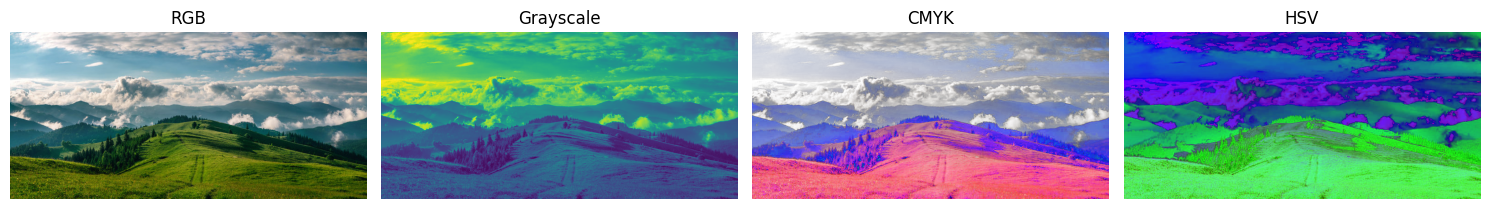

In [ ]:
image_dict = {
    "RGB": image,
    "Grayscale": convert_to_grayscale(image),
    "CMYK": convert_to_cmyk(image),
    "HSV": convert_to_hsv(image)
}

display_images(image_dict)

### Interact with user

Enter the path to the image: https://t3.ftcdn.net/jpg/03/06/22/80/360_F_306228011_2jldV5x45r0Ou3IiFJNMj3PDJPXKfgEX.jpg


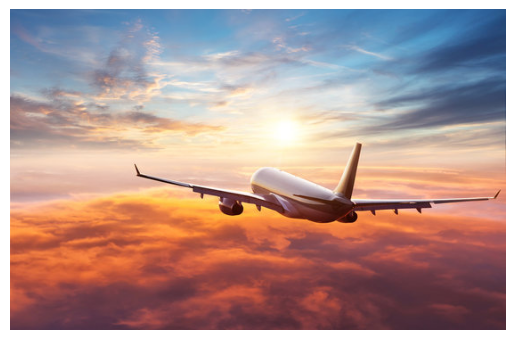

Enter the target colour scheme (RGB, Grayscale, CMYK, HSV): CMYK


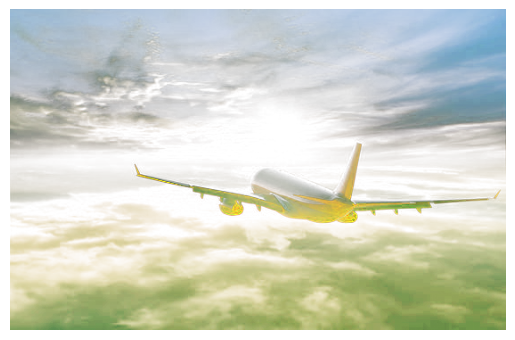

In [ ]:
import time

image_url = input("Enter the path to the image: ")
img = load_image(image_url)

time.sleep(4)

target = input("Enter the target colour scheme (RGB, Grayscale, CMYK, HSV): ")

def convert(target):
    """
    Function to convert the image to the target colour scheme.
    """
    if target == "RGB":
        return img
    elif target == "Grayscale":
        return convert_to_grayscale(img)
    elif target == "CMYK":
        return convert_to_cmyk(img)
    elif target == "HSV":
        return convert_to_hsv(img)
    else:
        print("Invalid target")
        return None

final = convert(target)

plt.imshow(final)
plt.axis('off')
plt.show()